# importar as libraries


In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
# lendo o data frame
df_pnadc2 = pd.read_csv('https://raw.githubusercontent.com/ClaudiaCCordeiro/Capstone_Coursera_Crccs/master/pnadc2019_2v1-02-11.csv')
df_pnadc2.head()

,Unnamed: 0,UF,SEXO,RACA,IDADE,EMPREGADO,FORMACAO,RENDIMENTO,REGIAO,IDADE_CLASS
0,0,11,F,PARDA,45,EMPREGADO,MEDIO,2300.0,NORTE,MEIA IDADE
1,1,11,M,PARDA,61,DESEMPREGADO,BASICO,NaN,NORTE,IDOSO
2,2,11,F,PARDA,27,DESEMPREGADO,NaN,NaN,NORTE,ADULTO
3,3,11,F,PRETA,18,DESEMPREGADO,MEDIO,NaN,NORTE,JOVEM
4,5,11,M,BRANCA,49,EMPREGADO,GRADUAÇÃO,3500.0,NORTE,MEIA IDADE


In [3]:
# deletar as colunas desnecessárias
df_pnadc2.drop(['Unnamed: 0', 'RENDIMENTO'], axis=1, inplace=True)

In [4]:
#verificando as informações sobre as caracteristicas dos dados
df_pnadc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437466 entries, 0 to 437465
Data columns (total 8 columns):
UF             437466 non-null int64
SEXO           437466 non-null object
RACA           437466 non-null object
IDADE          437466 non-null int64
EMPREGADO      437466 non-null object
FORMACAO       357747 non-null object
REGIAO         437466 non-null object
IDADE_CLASS    437389 non-null object
dtypes: int64(2), object(6)
memory usage: 26.7+ MB


In [5]:
#verificando os dados ausentes
missing_data = df_pnadc2.isnull()
missing_data.head()

,UF,SEXO,RACA,IDADE,EMPREGADO,FORMACAO,REGIAO,IDADE_CLASS
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

UF
False    437466
Name: UF, dtype: int64

SEXO
False    437466
Name: SEXO, dtype: int64

RACA
False    437466
Name: RACA, dtype: int64

IDADE
False    437466
Name: IDADE, dtype: int64

EMPREGADO
False    437466
Name: EMPREGADO, dtype: int64

FORMACAO
False    357747
True      79719
Name: FORMACAO, dtype: int64

REGIAO
False    437466
Name: REGIAO, dtype: int64

IDADE_CLASS
False    437389
True         77
Name: IDADE_CLASS, dtype: int64



In [7]:
df_pnadc2 = df_pnadc2.dropna(subset=['FORMACAO', 'IDADE_CLASS'])

In [8]:
df_pnadc2 = df_pnadc2.fillna(0)

In [9]:
# gerando os dados de estatistica descritiva
df_pnadc2.describe(include = "all")

,UF,SEXO,RACA,IDADE,EMPREGADO,FORMACAO,REGIAO,IDADE_CLASS
count,357710.000000,357710,357710,357710.000000,357710,357710,357710,357710
unique,NaN,2,6,NaN,2,5,5,4
top,NaN,F,PARDA,NaN,EMPREGADO,BASICO,NORDESTE,MEIA IDADE
freq,NaN,185501,177785,NaN,188883,167613,113739,168857
mean,31.379517,NaN,NaN,44.754379,NaN,NaN,NaN,NaN
std,10.815488,NaN,NaN,16.698961,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,15.000000,NaN,NaN,NaN,NaN
25%,23.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,43.000000,NaN,NaN,NaN,NaN
75%,41.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN


In [10]:
df_pnadc2['EMPREGADO'].value_counts()

EMPREGADO       188883
DESEMPREGADO    168827
Name: EMPREGADO, dtype: int64

In [11]:
Feature = df_pnadc2[['UF','SEXO']]
Feature = pd.concat([Feature,pd.get_dummies(df_pnadc2['RACA'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_pnadc2['FORMACAO'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_pnadc2['REGIAO'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_pnadc2['IDADE_CLASS'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_pnadc2['SEXO'])], axis=1)
Feature.head()

,UF,SEXO,AMARELA,BRANCA,INDIO,NAO_INFORMADO,PARDA,PRETA,BASICO,GRADUAÇÃO,...,NORDESTE,NORTE,SUDESTE,SUL,ADULTO,IDOSO,JOVEM,MEIA IDADE,F,M
0,11,F,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,11,M,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,11,F,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,11,M,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
6,11,F,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [12]:
Feature.drop(['SEXO'], axis = 1,inplace=True)
Feature.head()

,UF,AMARELA,BRANCA,INDIO,NAO_INFORMADO,PARDA,PRETA,BASICO,GRADUAÇÃO,MEDIO,...,NORDESTE,NORTE,SUDESTE,SUL,ADULTO,IDOSO,JOVEM,MEIA IDADE,F,M
0,11,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,11,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,11,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
6,11,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [14]:
X = Feature
X[0:5]

,UF,AMARELA,BRANCA,INDIO,NAO_INFORMADO,PARDA,PRETA,BASICO,GRADUAÇÃO,MEDIO,...,NORDESTE,NORTE,SUDESTE,SUL,ADULTO,IDOSO,JOVEM,MEIA IDADE,F,M
0,11,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,11,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,11,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
6,11,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [15]:
y = df_pnadc2['EMPREGADO'].values
y[0:5]

array(['EMPREGADO', 'DESEMPREGADO', 'DESEMPREGADO', 'EMPREGADO',
       'EMPREGADO'], dtype=object)

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.88429266, -0.07631069, -0.82071161, -0.06985402, -0.0088477 ,
         1.0060005 , -0.31408865, -0.93900135, -0.3739992 ,  1.31640661,
        -0.04583749, -0.20600859, -0.3311963 , -0.68278756,  2.63964058,
        -0.62348504, -0.46496437, -0.49743024, -0.48537798, -0.40166625,
         1.05755365,  0.96350682, -0.96350682],
       [-1.88429266, -0.07631069, -0.82071161, -0.06985402, -0.0088477 ,
         1.0060005 , -0.31408865,  1.06496119, -0.3739992 , -0.75964371,
        -0.04583749, -0.20600859, -0.3311963 , -0.68278756,  2.63964058,
        -0.62348504, -0.46496437, -0.49743024,  2.06025002, -0.40166625,
        -0.9455785 , -1.03787537,  1.03787537],
       [-1.88429266, -0.07631069, -0.82071161, -0.06985402, -0.0088477 ,
        -0.99403529,  3.18381453, -0.93900135, -0.3739992 ,  1.31640661,
        -0.04583749, -0.20600859, -0.3311963 , -0.68278756,  2.63964058,
        -0.62348504, -0.46496437, -0.49743024, -0.48537798,  2.48962915,
        -0.9455785 ,  0.9635

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (286168, 23) (286168,)
Test set: (71542, 23) (71542,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
yhat = neigh.predict(X_test)
yhat[0:5]


array(['EMPREGADO', 'EMPREGADO', 'EMPREGADO', 'EMPREGADO', 'DESEMPREGADO'],
      dtype=object)

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.670752844482961
Test set Accuracy:  0.6677476167845462


In [24]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62034889, 0.6073076 , 0.65744598, 0.64850018, 0.66774762,
       0.66073076, 0.68137597, 0.67679126, 0.68468871])

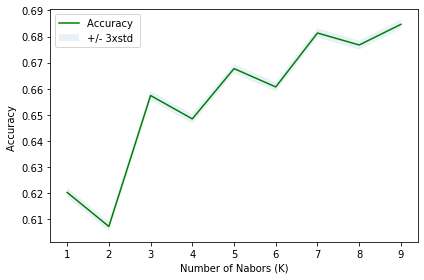

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.6846887143216572 with k= 9


In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


C:\Users\claud\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6846887143216572

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['EMPREGADO','DESEMPREGADO']))


[[27943  9874]
 [12684 21041]]


Confusion matrix, without normalization
[[27943  9874]
 [12684 21041]]


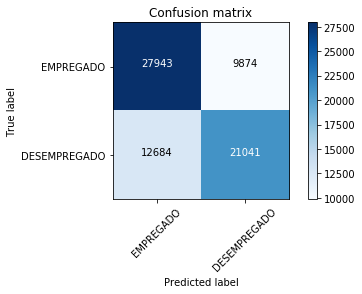

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['EMPREGADO','DESEMPREGADO'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['EMPREGADO','DESEMPREGADO'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

DESEMPREGADO       0.68      0.62      0.65     33725
   EMPREGADO       0.69      0.74      0.71     37817

    accuracy                           0.68     71542
   macro avg       0.68      0.68      0.68     71542
weighted avg       0.68      0.68      0.68     71542



In [45]:
Feature.columns[0:24]

Index(['UF', 'RENDIMENTO', 'AMARELA', 'BRANCA', 'INDIO', 'NAO_INFORMADO',
       'PARDA', 'PRETA', 'BASICO', 'GRADUAÇÃO', 'MEDIO', 'PHD',
       'PÓS GRADUAÇÃO', 'CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL',
       'ADULTO', 'IDOSO', 'JOVEM', 'MEIA IDADE', 'F', 'M'],
      dtype='object')

In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
loanTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
predTree = loanTree.predict(X_test)


In [34]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.968815520952727


In [35]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\claud\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        41.1 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge




cer

In [36]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\claud\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


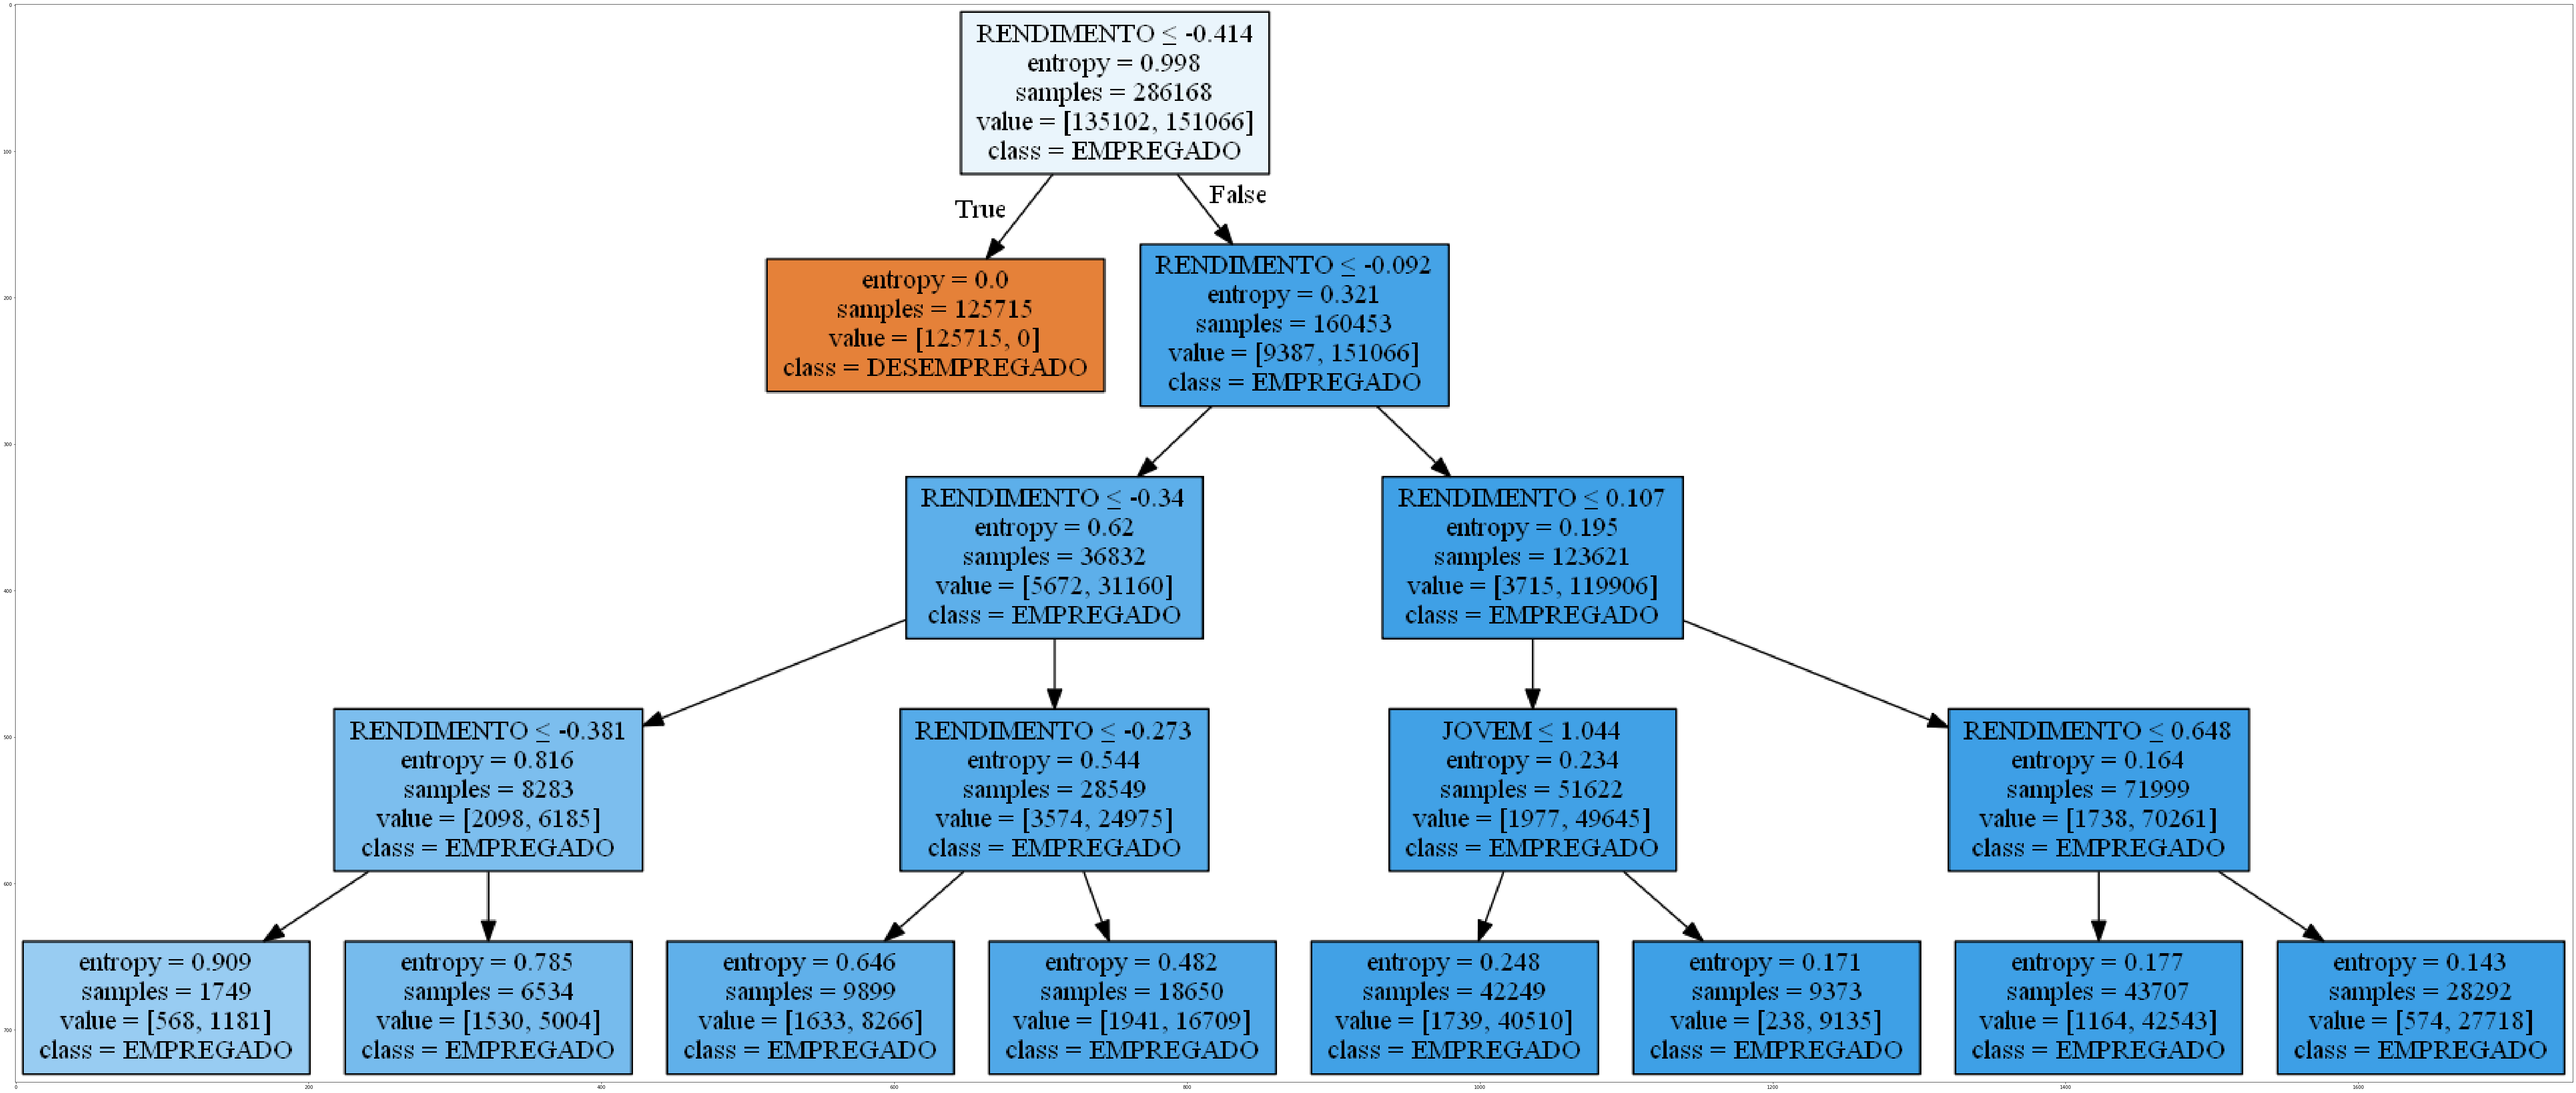

In [47]:
dot_data = StringIO()
filename = "loanTree.png"
featureNames = Feature.columns[0:24]
targetNames = df_pnadc2['EMPREGADO'].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

C:\Users\claud\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
yhatsvm = clf.predict(X_test)
yhatsvm [0:5]


In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testsvm, yhatsvm, labels=['PAIDOFF','COLLECTION']))


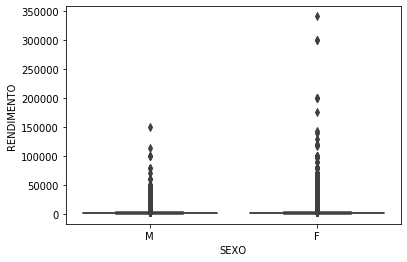

In [202]:
sns.boxplot(x="SEXO", y="RENDIMENTO", data=df_pnadc)

In [221]:
#criando categorias para a variavel idades
bins =[0, 14, 25, 35, 60, 100]
cats = pd.cut(df_pnadc['IDADE'], bins)
cats

0          (35.0, 60.0]
1         (60.0, 100.0]
2          (25.0, 35.0]
3          (14.0, 25.0]
4           (0.0, 14.0]
5          (35.0, 60.0]
6          (35.0, 60.0]
7          (35.0, 60.0]
8          (25.0, 35.0]
9          (14.0, 25.0]
10          (0.0, 14.0]
11         (14.0, 25.0]
12         (14.0, 25.0]
13         (35.0, 60.0]
14         (35.0, 60.0]
15         (25.0, 35.0]
16         (25.0, 35.0]
17         (25.0, 35.0]
18         (25.0, 35.0]
19         (14.0, 25.0]
20          (0.0, 14.0]
21         (25.0, 35.0]
22         (35.0, 60.0]
23          (0.0, 14.0]
24          (0.0, 14.0]
25         (35.0, 60.0]
26         (14.0, 25.0]
27          (0.0, 14.0]
28         (35.0, 60.0]
29         (25.0, 35.0]
              ...      
551318     (35.0, 60.0]
551319     (35.0, 60.0]
551320      (0.0, 14.0]
551321              NaN
551322     (35.0, 60.0]
551323     (35.0, 60.0]
551324     (14.0, 25.0]
551325     (35.0, 60.0]
551326     (35.0, 60.0]
551327     (35.0, 60.0]
551328    (60.0,

In [222]:
#contando os registro por categoria
pd.value_counts(cats)

(35, 60]     182677
(0, 14]      107745
(14, 25]      93813
(60, 100]     81224
(25, 35]      79675
Name: IDADE, dtype: int64

In [223]:
#dando o nome para as categorias
group_names = ['CRIANÇA', 'JOVEM', 'ADULTO', 'MEIA IDADE','IDOSO']
df_pnadc['IDADE_CLASS'] = pd.cut(df_pnadc['IDADE'], bins, labels = group_names)
df_pnadc.head()

,UF,SEXO,RACA,LER,FORMACAO,AFASTADO,EMPREGADO,RENDIMENTO,IDADE,IDADE_CLASS
0,11,M,PARDA,1.0,10.0,NaN,1.0,2300.0,45,MEIA IDADE
1,11,F,PARDA,1.0,7.0,2.0,0.0,NaN,61,IDOSO
2,11,M,PARDA,1.0,NaN,2.0,0.0,NaN,27,ADULTO
3,11,M,PRETA,1.0,10.0,2.0,0.0,NaN,18,JOVEM
4,11,F,BRANCA,1.0,NaN,NaN,0.0,NaN,6,CRIANÇA


In [224]:
#verificando a distribuição por categorias
pd.value_counts(cats)

(35, 60]     182677
(0, 14]      107745
(14, 25]      93813
(60, 100]     81224
(25, 35]      79675
Name: IDADE, dtype: int64

In [225]:
#nomeando as categorias de formação
group_names = ['BASICO', 'MEDIO', 'GRADUAÇÃO', 'PÓS GRADUAÇÃO','PHD']
df_pnadc['FORMACAO'] = pd.cut(df_pnadc['FORMACAO'], bins, labels = group_names)
df_pnadc.head()

,UF,SEXO,RACA,LER,FORMACAO,AFASTADO,EMPREGADO,RENDIMENTO,IDADE,IDADE_CLASS
0,11,M,PARDA,1.0,BASICO,NaN,1.0,2300.0,45,MEIA IDADE
1,11,F,PARDA,1.0,BASICO,2.0,0.0,NaN,61,IDOSO
2,11,M,PARDA,1.0,NaN,2.0,0.0,NaN,27,ADULTO
3,11,M,PRETA,1.0,BASICO,2.0,0.0,NaN,18,JOVEM
4,11,F,BRANCA,1.0,NaN,NaN,0.0,NaN,6,CRIANÇA


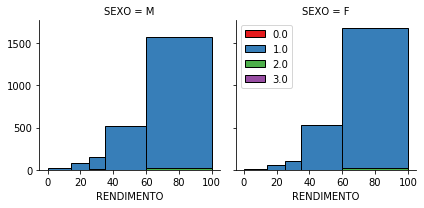

In [231]:
g = sns.FacetGrid(df_pnadc, col="SEXO", hue="EMPREGADO", palette="Set1", col_wrap=2)
g.map(plt.hist, 'RENDIMENTO', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

NameError: name 'bins' is not defined

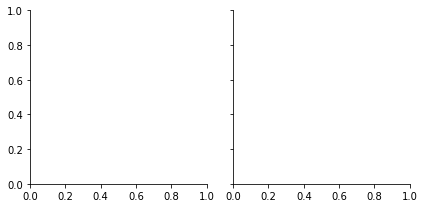

In [7]:
g = sns.FacetGrid(df_pnadc2, col="SEXO", hue="EMPREGADO", palette="Set1", col_wrap=2)
g.map(plt.hist, 'RENDIMENTO', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()